# PHARMACEUTICAL SALES ANALYTISIS & FORECASTING

## Time series analysis and forecasting


## USE CASE

To predict weekly sales of diffrent therapeutical medicine categories in a pharmacy.


## DATASET

The data set used is from kaggle.com.

The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Selected group of drugs from the dataset (57 drugs) is classified to the following Anatomical Therapeutic Chemical (ATC) Classification System categories:



- M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
- M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
- N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
- N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
-    N05B - Psycholeptics drugs, Anxiolytic drugs
-    N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
-    R03 - Drugs for obstructive airway diseases
-    R06 - Antihistamines for systemic use

In this project, we are using sales data are resampled to the daily and weekly periods. Data is already pre-processed, where processing included outlier detection and treatment and missing data imputation.


In [40]:
import warnings

import numpy as np
from numpy import array
import pandas as pd
from pandas import concat
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import ParameterGrid

pd.plotting.register_matplotlib_converters()

warnings.filterwarnings("ignore")

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
import math


In [5]:
daily_sales = pd.read_csv("../input/pharma-sales-data/salesdaily.csv")
daily_sales.shape

(2106, 13)

In [6]:
daily_sales.head(10)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.00,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.00,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.00,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.00,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday
5,1/7/2014,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,2014,1,276,Tuesday
6,1/8/2014,5.33,3.00,10.5,26.40,19.0,1.0,10.0,0.0,2014,1,276,Wednesday
7,1/9/2014,7.00,1.68,8.0,25.00,16.0,0.0,3.0,2.0,2014,1,276,Thursday
8,1/10/2014,5.00,2.00,2.0,53.30,15.0,2.0,0.0,2.0,2014,1,276,Friday
9,1/11/2014,5.00,4.34,10.4,52.30,14.0,0.0,1.0,0.2,2014,1,276,Saturday


In [7]:
daily_sales.tail(10)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
2096,9/29/2019,3.51,3.867,3.00,67.80,6.0,0.0,3.0,2.10,2019,9,276,Sunday
2097,9/30/2019,2.00,1.439,2.10,49.40,9.0,0.0,5.0,2.00,2019,9,276,Monday
2098,10/1/2019,11.34,2.406,0.10,47.00,15.0,4.0,17.0,1.50,2019,10,276,Tuesday
2099,10/2/2019,5.18,3.274,2.80,30.20,9.0,1.0,0.0,1.10,2019,10,276,Wednesday
2100,10/3/2019,5.00,3.000,4.00,40.40,10.0,0.0,2.0,2.00,2019,10,276,Thursday
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday
2105,10/8/2019,0.33,1.730,0.50,44.30,20.0,2.0,2.0,0.00,2019,10,190,Tuesday


In [9]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


## TIME SERIES ANALYSIS 

**Time Series Analysis included seasonality, stationarity, autocorrelation, regularity and data distribution analysis.**

### Seasonality analysis

The seasonality patterns can be explored by using boxplots.

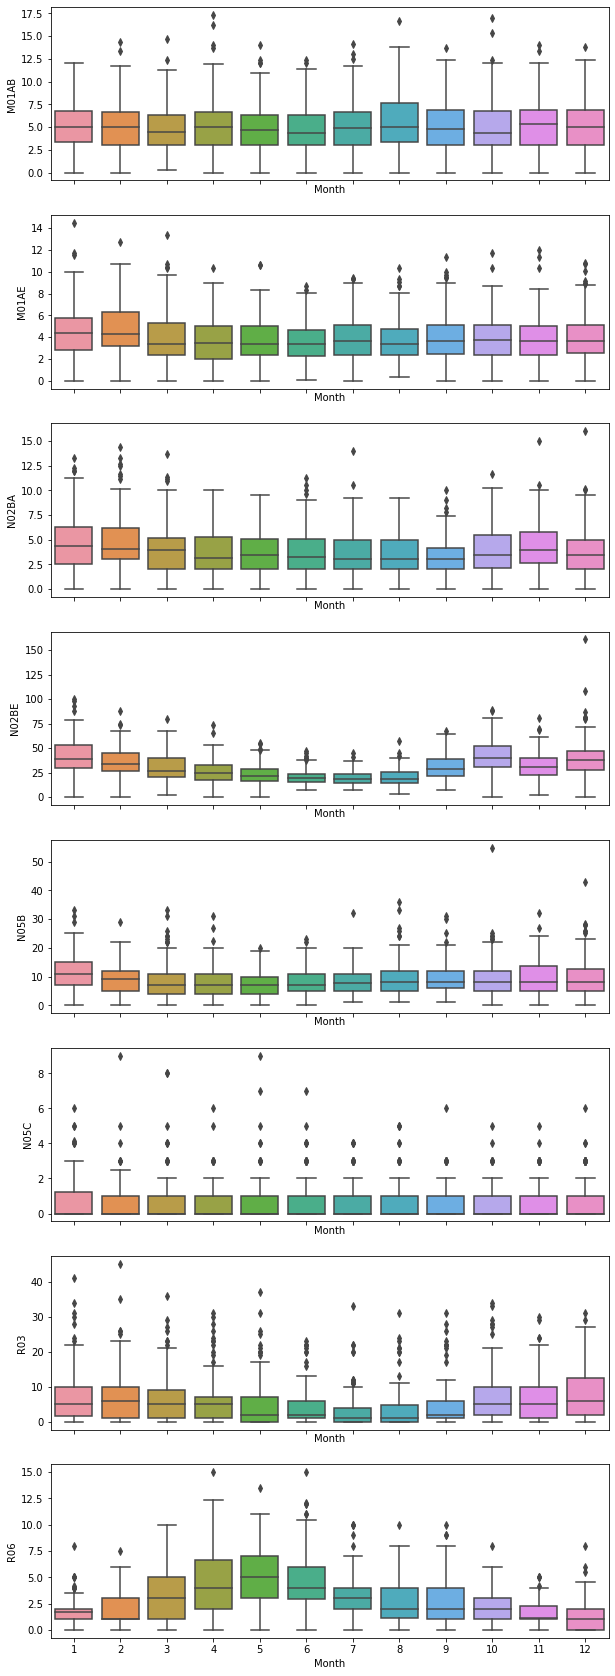

In [10]:
import seaborn as sns

fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=daily_sales, x="Month", y=name, ax=ax)

From the above visualization, we can see that there is a clear seasonality pattern in "N02BE", "R03",and "R06" categories.

Another visualization that can be useful for discovering seasonality patterns is related to rolling window mean. Rolling window operations are another important transformation for time series data. 

Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at larger time scales.Analysis below shows 30-day and 365-day rolling mean of sales data.

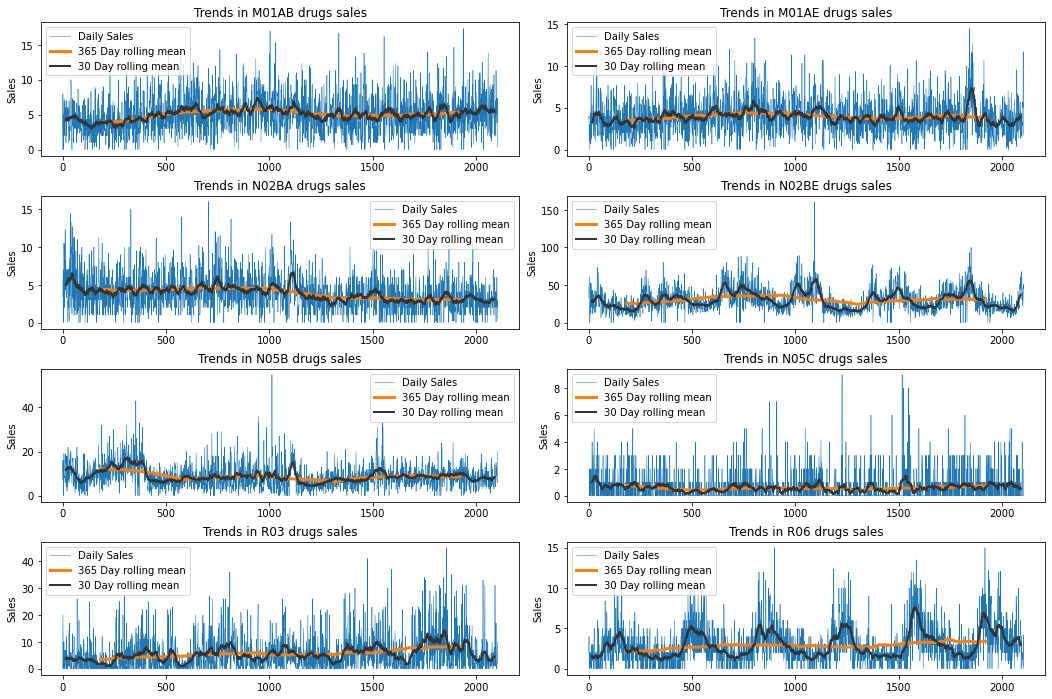

In [12]:
cols = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']

sales_365_rolling = daily_sales[cols].rolling(window=365, center=True).mean()
sales_30_rolling = daily_sales[cols].rolling(window=30, center=True).mean()
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)


for x in cols:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex, colindex].plot(daily_sales.loc[:, x],linewidth=0.5, label="Daily Sales" )
    ax[rowindex, colindex].plot(sales_365_rolling.loc[:, x],linewidth= 3, label="365 Day rolling mean")
    ax[rowindex, colindex].plot(sales_30_rolling.loc[:, x], color='0.2', linewidth= 2,label="30 Day rolling mean")
    ax[rowindex, colindex].set_ylabel("Sales")
    ax[rowindex, colindex].legend()
    ax[rowindex, colindex].set_title('Trends in '+x+' drugs sales');
    subplotindex=subplotindex+1
plt.show()
    

Image below shows trends for each of the drug categories, represented by the 365-d rolling means for each of those categories.

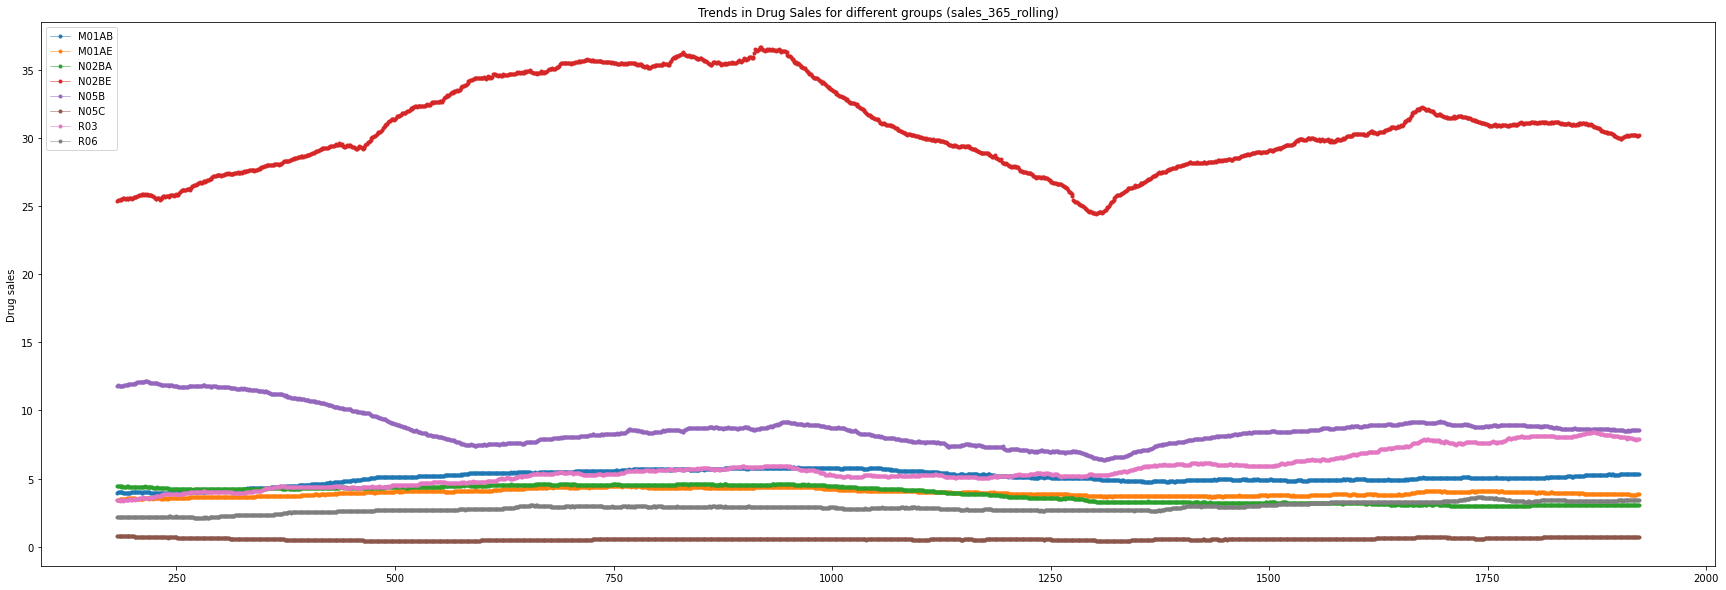

In [13]:
fig, ax = plt.subplots(figsize=(30, 10))
for x in cols:
    ax.plot(sales_365_rolling[x], label=x, marker='.', linestyle='-', linewidth=0.5)
    ax.legend()
    ax.set_ylabel('Drug sales')
    ax.set_title('Trends in Drug Sales for different groups (sales_365_rolling)');

Trends and seasonality can be explored in time series decomposition view, based on 30 day rolling means.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


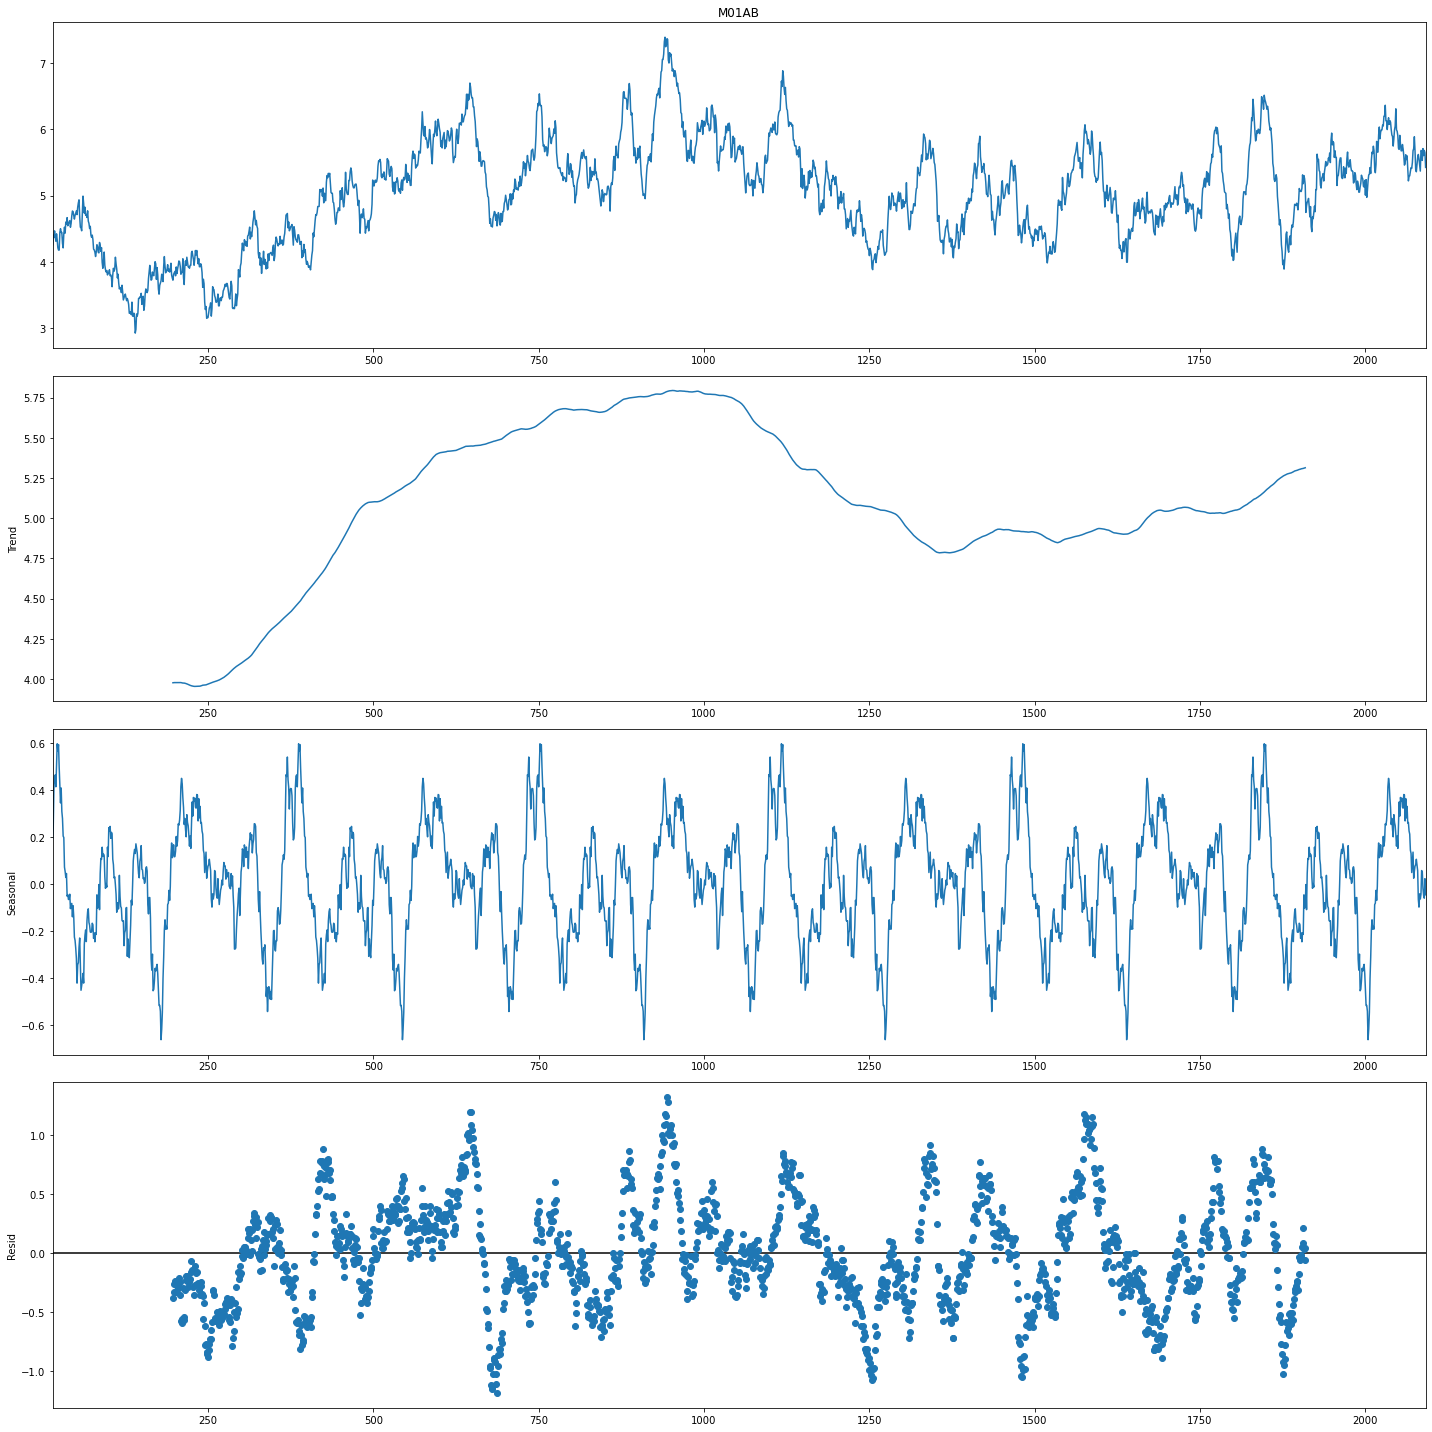

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(daily_sales['M01AB'].rolling(30, center=True).mean().dropna(), freq=365, filt=None)
plt.rcParams["figure.figsize"] = (20,20)
result.plot()
plt.show()


### Stationarity analysis

Stationarity of time-series is the property of exhibiting constant statistical properties over time (for example, mean, variance, autocorrelation). It can be visually determined by plotting rolling statistics (rolling means and variances) or by using Augmented Dickey-Fuller (ADF) or Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. ADF test assumes that the null hypothesis is the time series possesses unit root and is non-stationary. If the P-Value of ADF test is less than 0.05, the null hypothesis is rejected and series is considered as stationary. KPSS is used to test for trend stationarity. One series is considered trend stationary if after removing the underlying trend, series becomes stationary.

In [15]:
from statsmodels.tsa.stattools import adfuller

for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    dftest = adfuller(daily_sales[x], regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

ADF test for M01AB
-----------------------------
Test statistic = -8.669
P-value = 0.000
Critical values :
	1%: -3.9631060717799924 - The data is  stationary with 99% confidence
	5%: -3.41259173685078 - The data is  stationary with 95% confidence
	10%: -3.1282874376905356 - The data is  stationary with 90% confidence
ADF test for M01AE
-----------------------------
Test statistic = -7.471
P-value = 0.000
Critical values :
	1%: -3.9631206583322434 - The data is  stationary with 99% confidence
	5%: -3.4125988034261017 - The data is  stationary with 95% confidence
	10%: -3.128291597193074 - The data is  stationary with 90% confidence
ADF test for N02BA
-----------------------------
Test statistic = -7.829
P-value = 0.000
Critical values :
	1%: -3.9631123111656277 - The data is  stationary with 99% confidence
	5%: -3.412594759575526 - The data is  stationary with 95% confidence
	10%: -3.1282892169169547 - The data is  stationary with 90% confidence
ADF test for N02BE
----------------------

Augmented Dickey-Fuller (ADF) test have shown that all data in the series were stationary, with maximum confidence. ADF test assumes that the null hypothesis is the time series possesses unit root and is non-stationary. If the P-Value of ADF test is less than 0.05, the null hypothesis is rejected and series is considered as stationary.

In [16]:
from statsmodels.tsa.stattools import kpss
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    print(" > Is "+x+" data stationary ?")
    dftest = kpss(np.log(daily_sales[x]), 'ct')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[3].items():
        print("\t{}: {}".format(k, v))

 > Is M01AB data stationary ?
Test statistic = nan
P-value = nan
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is M01AE data stationary ?
Test statistic = nan
P-value = nan
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BA data stationary ?
Test statistic = nan
P-value = nan
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BE data stationary ?
Test statistic = nan
P-value = nan
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05B data stationary ?
Test statistic = nan
P-value = nan
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05C data stationary ?
Test statistic = nan
P-value = nan
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R03 data stationary ?
Test statistic = nan
P-value = nan
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R06 data stationary ?
Test statistic = nan
P-value = nan
Critical values :
	10%: 0.119
	

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test did not found the trend non-stationarity

### Regularity analysis

For calculating regularity and predictability of time series, Approximate Entropy test is used.
Entropy values higher than 1 indicating low predictability

In [17]:
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    print(x + ': ' + str(ApEn(daily_sales[x].values, m=2, r=0.2*np.std(daily_sales[x].values))))

M01AB: 1.9240540330273106
M01AE: 1.857327473757116
N02BA: 1.892642953919645
N02BE: 1.6799337801661745
N05B: 1.6861129738301162
N05C: 0.9828634612700058
R03: 1.5583141792099964
R06: 1.7019103198024172


### Autocorrelation analysis

Autocorrelation analysis illustrates the potential for time series data prediction. Autocorrelation plots graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. Pearson coefficient is used to measure autocorrelation. Thus, the following analysis is relevant only for data with normal Gaussian distribution.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function (ACF). This plot is sometimes called a correlogram or an autocorrelation plot. Plot shows the lag value along the x-axis and the correlation on the y-axis between -1 and 1. Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation.

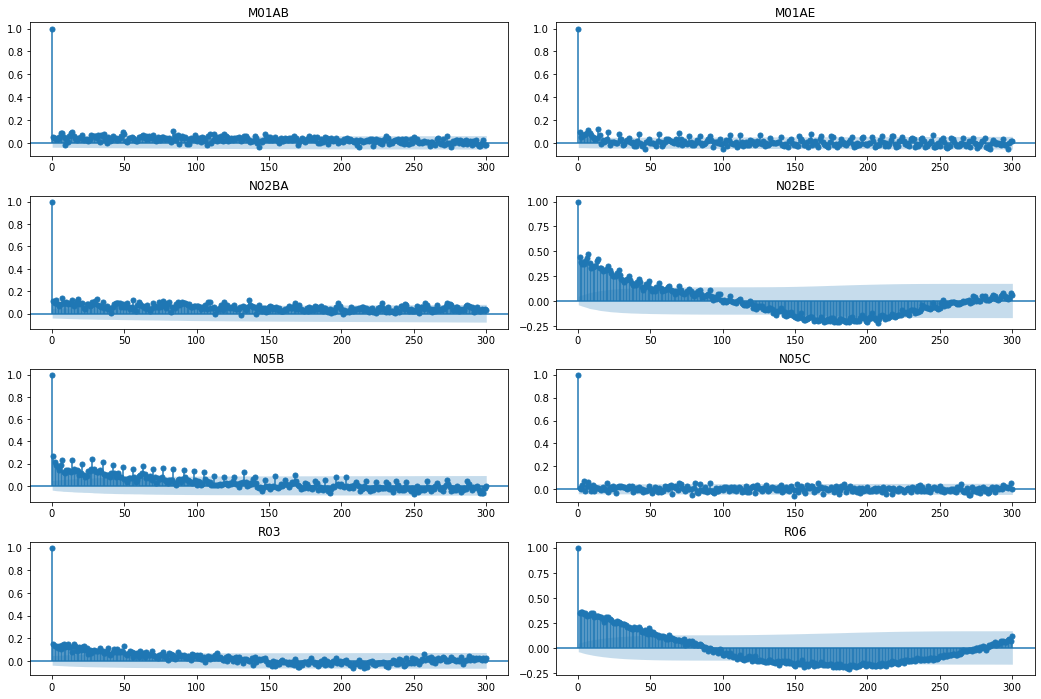

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_acf(daily_sales[x], lags=300, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1


The "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. For example, if we are regressing a variable Y on other variables X1, X2, and X3, the partial correlation between Y and X3 is the amount of correlation between Y and X3 that is not explained by their common correlations with X1 and X2.

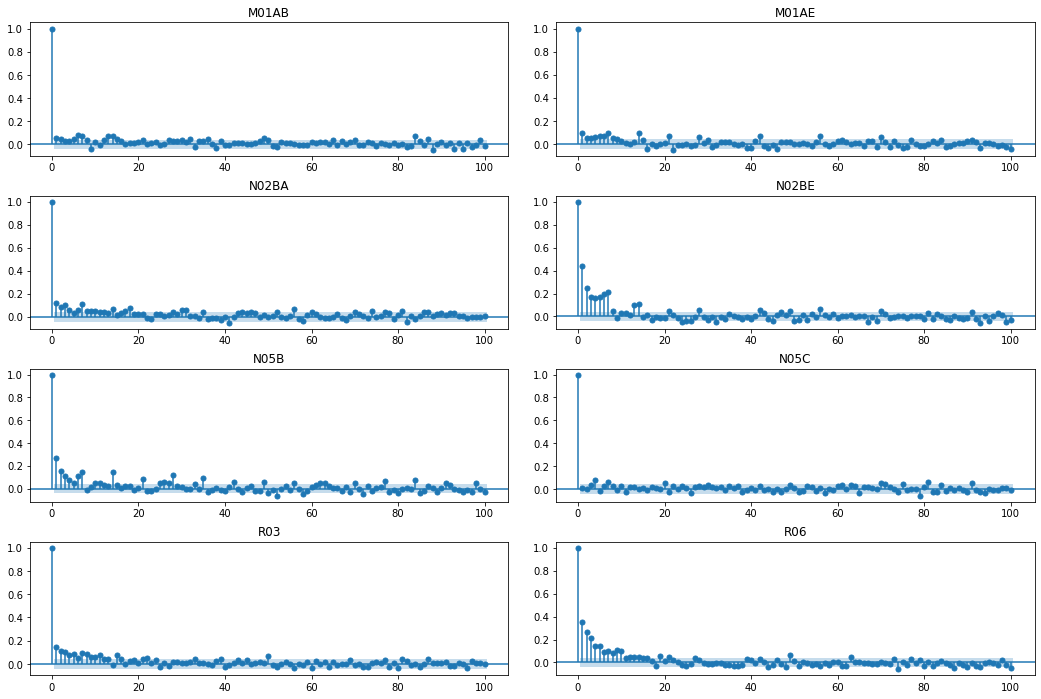

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(daily_sales[x], lags=100, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

Minor autocorrelation is observed at ACF (Auto-Correlation Function) and PACF (Partial Auto-Correlation Function) plots for all series, with exception of N05C sales. N02BE, R03 and R06 series were found to exhibit annual seasonality. NO2BE and R06 shown seasonality.

### Data distribution analysis

Chart with daily sales for different categories of interest is shown below

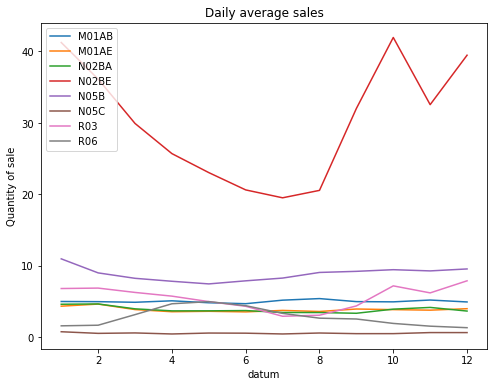

In [20]:
daily_sales['datum']= pd.to_datetime(daily_sales['datum']) 

grp1=daily_sales.groupby(daily_sales.datum.dt.month)['M01AB'].mean()
grp2=daily_sales.groupby(daily_sales.datum.dt.month)['M01AE'].mean()
grp3=daily_sales.groupby(daily_sales.datum.dt.month)['N02BA'].mean()
grp4=daily_sales.groupby(daily_sales.datum.dt.month)['N02BE'].mean()
grp5=daily_sales.groupby(daily_sales.datum.dt.month)['N05B'].mean()
grp6=daily_sales.groupby(daily_sales.datum.dt.month)['N05C'].mean()
grp7=daily_sales.groupby(daily_sales.datum.dt.month)['R03'].mean()
grp8=daily_sales.groupby(daily_sales.datum.dt.month)['R06'].mean()

plt.title('Daily average sales')
plt.xlabel('Time of day')
plt.ylabel('Quantity of sale')

grp1.plot(figsize=(8,6))
grp2.plot(figsize=(8,6))
grp3.plot(figsize=(8,6))
grp4.plot(figsize=(8,6))
grp5.plot(figsize=(8,6))
grp6.plot(figsize=(8,6))
grp7.plot(figsize=(8,6))
grp8.plot(figsize=(8,6))

plt.legend(['M01AB', 'M01AE', 'N02BA','N02BE','N05B', 'N05C', 'R03', 'R06'], loc='upper left')

plt.show()

Chart with monthly sales for different categories of interest was shown. we will suppress N02BE and N05B charts.
Because of the larger scale which makes the other illustrations less readable.

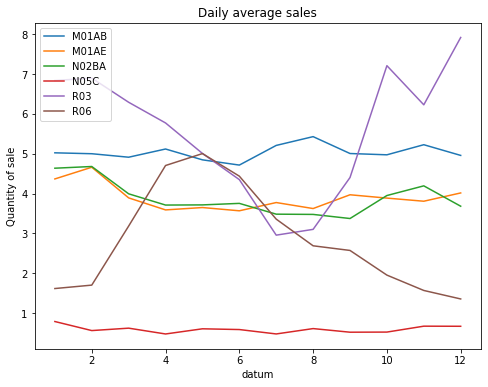

In [21]:
daily_sales['datum']= pd.to_datetime(daily_sales['datum']) 

grp1=daily_sales.groupby(daily_sales.datum.dt.month)['M01AB'].mean()
grp2=daily_sales.groupby(daily_sales.datum.dt.month)['M01AE'].mean()
grp3=daily_sales.groupby(daily_sales.datum.dt.month)['N02BA'].mean()
grp6=daily_sales.groupby(daily_sales.datum.dt.month)['N05C'].mean()
grp7=daily_sales.groupby(daily_sales.datum.dt.month)['R03'].mean()
grp8=daily_sales.groupby(daily_sales.datum.dt.month)['R06'].mean()

plt.title('Daily average sales')
plt.xlabel('Time of day')
plt.ylabel('Quantity of sale')

grp1.plot(figsize=(8,6))
grp2.plot(figsize=(8,6))
grp3.plot(figsize=(8,6))
grp6.plot(figsize=(8,6))
grp7.plot(figsize=(8,6))
grp8.plot(figsize=(8,6))

plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper left')

plt.show()

## TIME SERIES FORECASTING

Forecasting models were fitted with weekly time-series data with dataset of 302 rows. The forecasting methods used is ARIMA. Train-test split method was used (52 weeks of test data).  

Forecasting results are validated by using two approaches: short-term and long-term forecasts. 


We will create two data frames to store model score of the both short-term and long-term forecast.

In [22]:
resultsRolling={'M01AB':[0.0,0.0,0.0,0.0],
     'M01AE':[0.0,0.0,0.0,0.0],
     'N02BA':[0.0,0.0,0.0,0.0],
     'N02BE':[0.0,0.0,0.0,0.0],
     'N05B':[0.0,0.0,0.0,0.0],
     'N05C':[0.0,0.0,0.0,0.0],
     'R03':[0.0,0.0,0.0,0.0],
     'R06':[0.0,0.0,0.0,0.0]}
resultsRollingdf = pd.DataFrame(resultsRolling)
resultsRollingdf.index = ['ARIMA MSE', 'ARIMA MAPE', 'AutoARIMA MSE', 'AutoARIMA MAPE']
resultsLongterm={'M01AB':[0.0,0.0,0.0,0.0],
     'M01AE':[0.0,0.0,0.0,0.0],
     'N02BA':[0.0,0.0,0.0,0.0],
     'N02BE':[0.0,0.0,0.0,0.0],
     'N05B':[0.0,0.0,0.0,0.0],
     'N05C':[0.0,0.0,0.0,0.0],
     'R03':[0.0,0.0,0.0,0.0],
     'R06':[0.0,0.0,0.0,0.0]}
resultsLongtermdf = pd.DataFrame(resultsLongterm)
resultsLongtermdf.index = ['ARIMA MSE', 'ARIMA MAPE', 
                           'AutoARIMA MSE', 'AutoARIMA MAPE']

## ARIMA Forecasting 

ARIMA method was used to to carry out short-term (rolling forecast) and long-term forecasting based on test data. Before each forecast is made, the process of optimizing hyper-parameters (p,d,q) of ARIMA model was carry out. Then, with optimal set of parameters, rolling forecast and long-term forecasting was carried out. Seasonal ARIMA (SARIMA) method was tested by using Auto-ARIMA implementation. This implementation has built-in stepwise optimizer which chooses optimal set of parameters (p,d,q for non-seasonal and p,d,q,P,D,Q for seasonal series, namely N02BE, R03 and R06).


First, method arma_order_select_ic was used to determine initial p and q parameters. The method computes Akaike’s Information Criterion (AIC) for many ARIMA models and chooses the best configuration. It is important to note that AIC tend not to be a good guide to selecting the appropriate order of differencing (d) of a model, but only for selecting the values of p and q.

In [27]:
warnings.filterwarnings("ignore")
import statsmodels.api as sm
df=pd.read_csv('../input/pharma-sales-data/salesweekly.csv')
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    resDiff = sm.tsa.arma_order_select_ic(df[x], max_ar=5, max_ma=5, ic='aic', trend='c')
    print('ARMA(p,q,'+x+') =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q,M01AB) = (3, 3) is the best.
ARMA(p,q,M01AE) = (2, 0) is the best.
ARMA(p,q,N02BA) = (5, 4) is the best.
ARMA(p,q,N02BE) = (2, 2) is the best.
ARMA(p,q,N05B) = (5, 5) is the best.
ARMA(p,q,N05C) = (2, 3) is the best.
ARMA(p,q,R03) = (3, 3) is the best.
ARMA(p,q,R06) = (2, 2) is the best.


Grid search optimization for rolling forecast produced the following best combinations of the hyper-parameters:

In [28]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error

def evaluate_models(f, dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print(f+' - Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

warnings.filterwarnings("ignore")

df=pd.read_csv('../input/pharma-sales-data/salesweekly.csv')

for f in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    evaluate_models(f, df[f].values, p_values, d_values, q_values)

M01AB - Best ARIMANone MSE=inf
M01AE - Best ARIMANone MSE=inf
N02BA - Best ARIMANone MSE=inf
N02BE - Best ARIMANone MSE=inf
N05B - Best ARIMANone MSE=inf
N05C - Best ARIMANone MSE=inf
R03 - Best ARIMANone MSE=inf
R06 - Best ARIMANone MSE=inf


Grid search optimization for long-term forecast produced the following best combinations of the hyper-parameters:

In [29]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) - 50)
    train, test = X[0:train_size], X[train_size:]
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.predict(1,len(test))
    error = mean_squared_error(test, forecast)
    return error

def evaluate_models(f, dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print(f+' - Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

warnings.filterwarnings("ignore")

for f in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    evaluate_models(f, df[f].values, p_values, d_values, q_values)

M01AB - Best ARIMANone MSE=inf
M01AE - Best ARIMANone MSE=inf
N02BA - Best ARIMANone MSE=inf
N02BE - Best ARIMANone MSE=inf
N05B - Best ARIMANone MSE=inf
N05C - Best ARIMANone MSE=inf
R03 - Best ARIMANone MSE=inf
R06 - Best ARIMANone MSE=inf


From the optimization stand of point, some series are considered as so-called white noise - random time series data. Those are series for whom the best result was achieved with p=0, d=0 and q=0.

### Rolling forecasting with ARIMA model

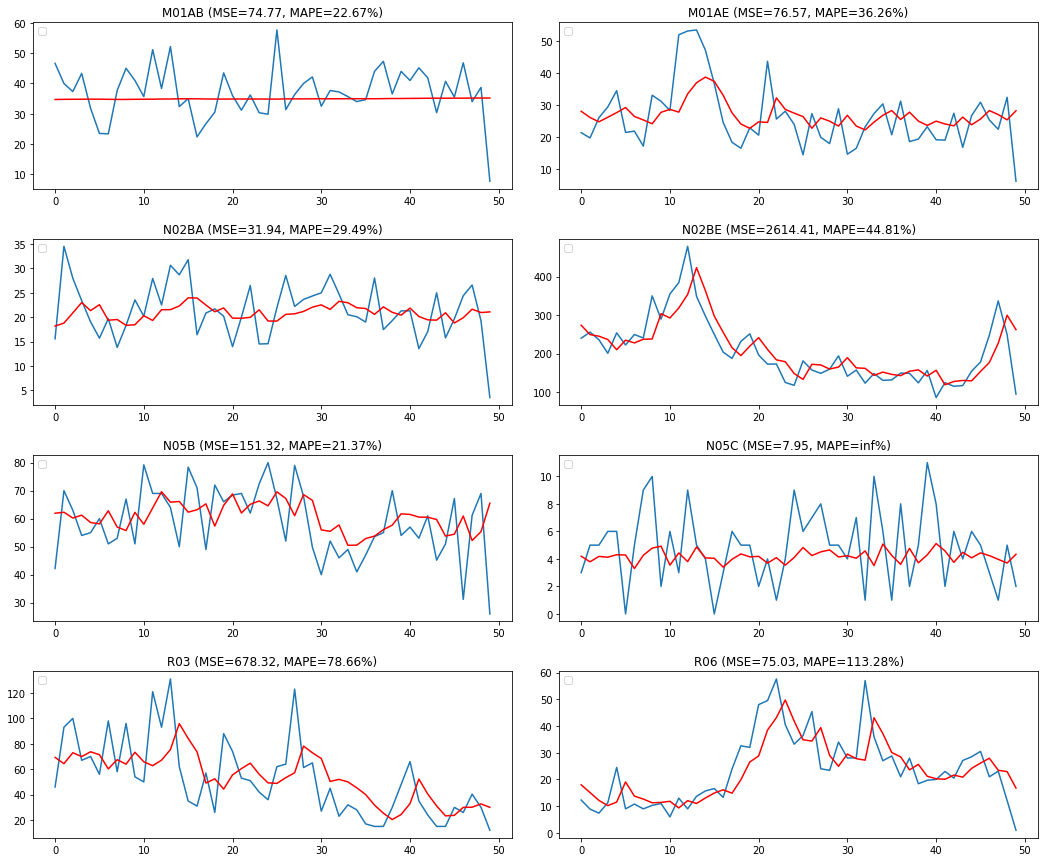

In [41]:
df=pd.read_csv('../input/pharma-sales-data/salesweekly.csv')

M01AB= {'series':'M01AB','p':0,'d':0,'q':0}
M01AE= {'series':'M01AE','p':2,'d':0,'q':0}
N02BA= {'series':'N02BA','p':5,'d':1,'q':1}
N02BE= {'series':'N02BE','p':2,'d':0,'q':0}
N05B= {'series':'N05B','p':0,'d':0,'q':5}
N05C= {'series':'N05C','p':0,'d':0,'q':1}
R03= {'series':'R03','p':5,'d':1,'q':1}
R06= {'series':'R06','p':1,'d':0,'q':1}

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x['series']].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(x['p'],x['d'],x['q']))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['ARIMA MSE',x['series']]=error
    resultsRollingdf.loc['ARIMA MAPE',x['series']]=perror
    ax[rowindex,colindex].set_title(x['series']+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

### Long-term forecasting with ARIMA model

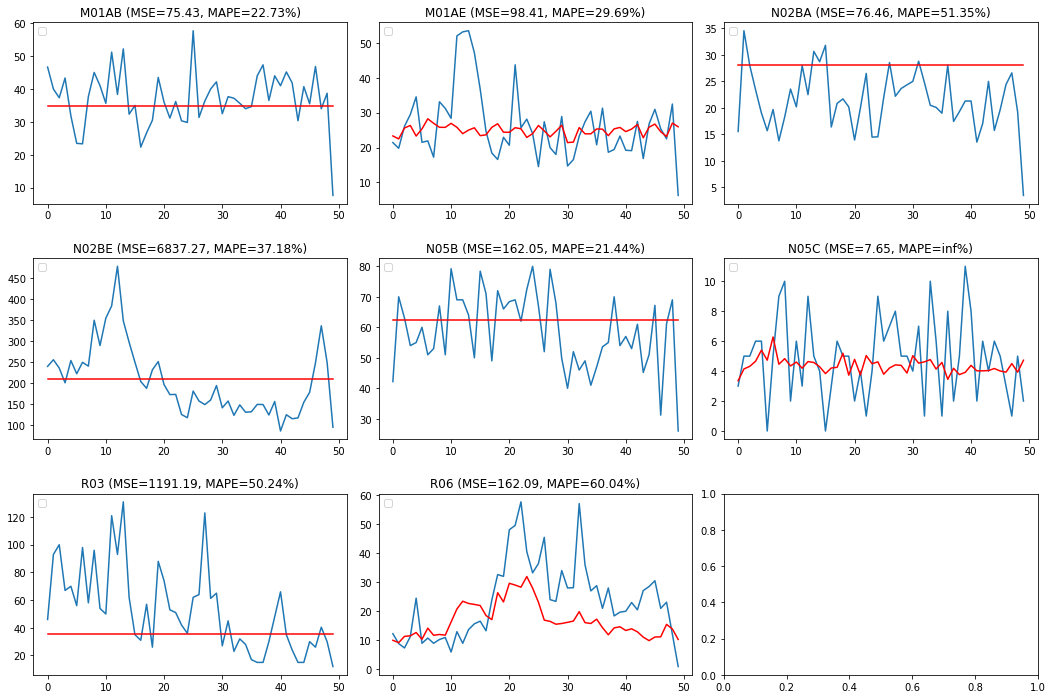

In [42]:
df=pd.read_csv('../input/pharma-sales-data/salesweekly.csv')

M01AB= {'series':'M01AB','p':0,'d':0,'q':0}
M01AE= {'series':'M01AE','p':4,'d':0,'q':4}
N02BA= {'series':'N02BA','p':0,'d':0,'q':0}
N02BE= {'series':'N02BE','p':0,'d':0,'q':0}
N05B= {'series':'N05B','p':0,'d':0,'q':0}
N05C= {'series':'N05C','p':2,'d':0,'q':2}
R03= {'series':'R03','p':0,'d':0,'q':0}
R06= {'series':'R06','p':2,'d':0,'q':2}

subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x['series']].values
    size = int(len(X) - 50)
    train, test = X[0:size], X[size:len(X)]
    model = ARIMA(train, order=(x['p'],x['d'],x['q']))
    model_fit = model.fit()
    forecast = model_fit.predict(1,len(test))
    error = mean_squared_error(test, forecast)
    perror = mean_absolute_percentage_error(test, forecast)
    resultsLongtermdf.loc['ARIMA MSE',x['series']]=error
    resultsLongtermdf.loc['ARIMA MAPE',x['series']]=perror
    ax[rowindex,colindex].set_title(x['series']+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(forecast, color='red')
    subplotindex=subplotindex+1
plt.show()

### Rolling forecasting with Auto-ARIMA model

In [46]:
! pip install pmdarima

     |████████████████████████████████| 1.5 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 7.0 MB/s eta 0:00:01
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


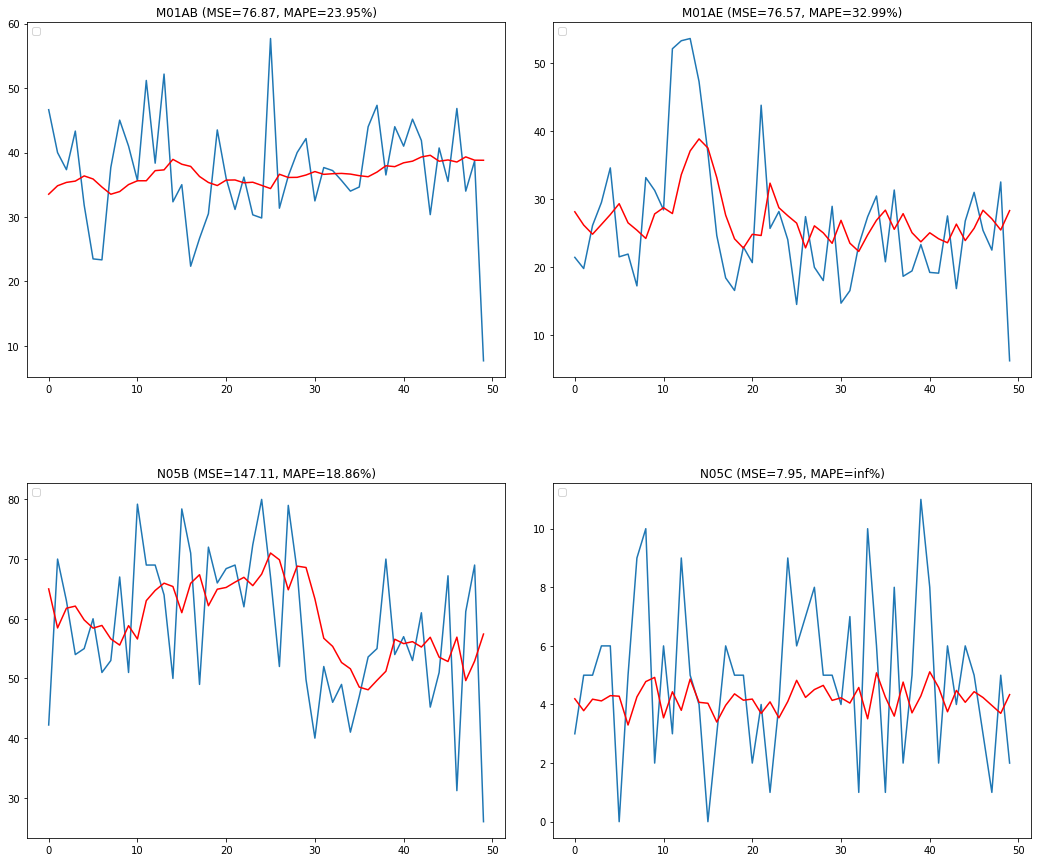

In [47]:
from pmdarima.arima import auto_arima
df=pd.read_csv('../input/pharma-sales-data/salesweekly.csv')
subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in ['M01AB','M01AE','N05B','N05C']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
        if (x=='N02BA' or x=='N02BE' or x=='R03' or x=='R06'):
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        else:
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['AutoARIMA MSE',x]=error
    resultsRollingdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

### Long-term forecasting with Auto-ARIMA model

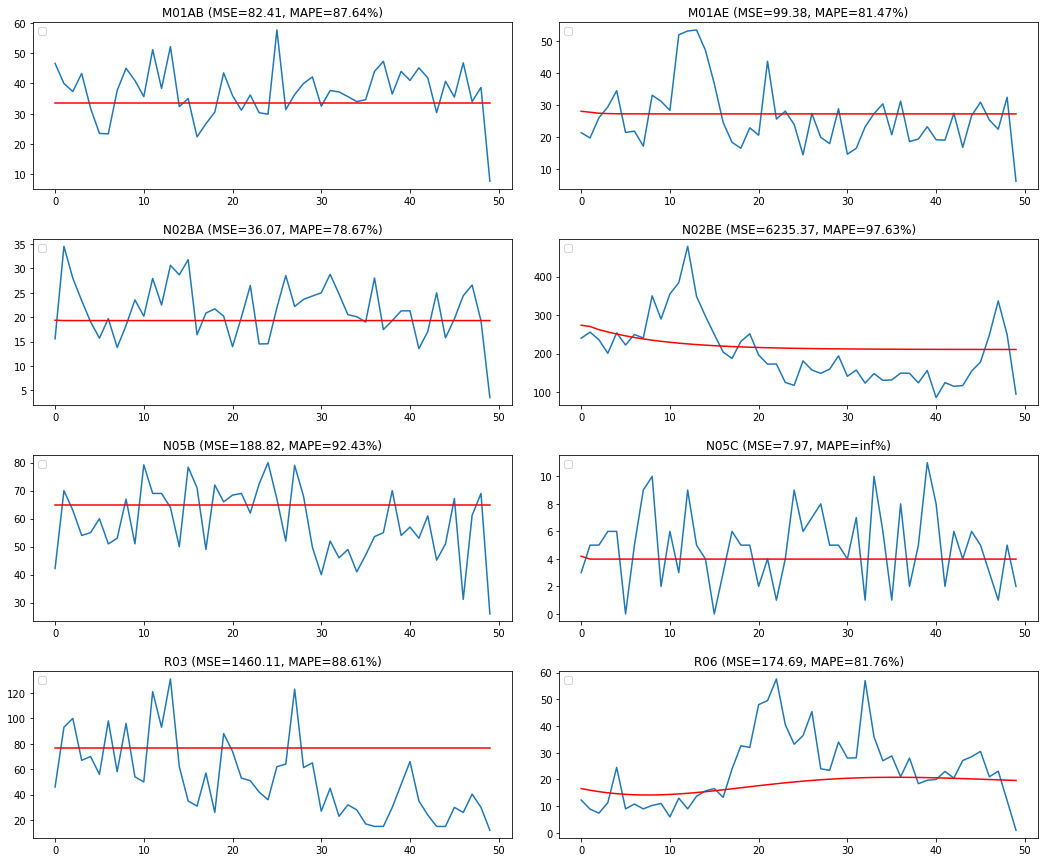

In [53]:
df=pd.read_csv('../input/pharma-sales-data/salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = int(len(X) - 50)
    train, test = X[0:size], X[size:len(X)]
    
    model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
    model_fit = model.fit(train)
    forecast = model_fit.predict(n_periods=len(test))
    error = mean_squared_error(test, forecast)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsLongtermdf.loc['AutoARIMA MSE',x]=error
    resultsLongtermdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(forecast, color='red')
    subplotindex=subplotindex+1
plt.show()

### Conclusion

Let us see the model performance

In [50]:
from IPython.display import display, HTML
display(HTML(resultsLongtermdf.to_html()))

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
ARIMA MSE,75.428944,98.405812,76.460997,6837.269575,162.050944,7.654474,1191.186483,162.094796
ARIMA MAPE,22.727171,29.686095,51.351070,37.175661,21.443035,inf,50.243843,60.042463
AutoARIMA MSE,82.408910,99.381683,36.073599,4065.168032,188.820502,7.974191,1286.071138,174.685428
AutoARIMA MAPE,87.643451,81.471827,78.669904,97.628300,92.426155,inf,88.611086,81.761817


In [51]:
from IPython.display import display, HTML
display(HTML(resultsLongtermdf.to_html()))

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
ARIMA MSE,75.428944,98.405812,76.460997,6837.269575,162.050944,7.654474,1191.186483,162.094796
ARIMA MAPE,22.727171,29.686095,51.351070,37.175661,21.443035,inf,50.243843,60.042463
AutoARIMA MSE,82.408910,99.381683,36.073599,4065.168032,188.820502,7.974191,1286.071138,174.685428
AutoARIMA MAPE,87.643451,81.471827,78.669904,97.628300,92.426155,inf,88.611086,81.761817


For rolling forecast, ARIMA method (Auto-ARIMA for series with seasonal character) perform well and is good for short-term sales forecasting.